Train full: (75158, 12) | Test: (23459, 12)
Train sub: (62786, 12) | Valid: (12372, 12)
Train full: (75158, 8) | Test: (23459, 8)
Train sub: (62786, 8) | Valid: (12372, 8)
Train full: (75158, 11) | Test: (23459, 11)
Train sub: (62786, 11) | Valid: (12372, 11)
Train full: (75158, 9) | Test: (23459, 9)
Train sub: (62786, 9) | Valid: (12372, 9)
Train full: (75158, 15) | Test: (23459, 15)
Train sub: (62786, 15) | Valid: (12372, 15)
Train full: (75158, 12) | Test: (23459, 12)
Train sub: (62786, 12) | Valid: (12372, 12)
Train full: (75158, 19) | Test: (23459, 19)
Train sub: (62786, 19) | Valid: (12372, 19)
Train full: (75158, 13) | Test: (23459, 13)
Train sub: (62786, 13) | Valid: (12372, 13)
Train full: (75158, 15) | Test: (23459, 15)
Train sub: (62786, 15) | Valid: (12372, 15)
Train full: (75158, 9) | Test: (23459, 9)
Train sub: (62786, 9) | Valid: (12372, 9)
Train full: (75158, 26) | Test: (23459, 26)
Train sub: (62786, 26) | Valid: (12372, 26)

🏆 Feature Subset Comparison Results:


,Subset,Features,R²,RMSE,MAE
6,"Set 7: Base + Delay and Disruption (cat), with...","[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.818630,91.734186,58.841213
7,"Set 8: Base + Delay and Disruption (min), with...","[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.817897,91.919254,59.131586
5,Set 6: Base + Disruptions features,"[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.817325,92.063437,59.304244
1,Set 2: Base + Delay (min),"[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.810779,93.698370,59.251726
0,Set 1: Base + Delay (cat),"[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.810762,93.702791,59.035755
8,"Set 9: Base + Delay and Disruption (cat), no f...","[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.809375,94.045585,59.166878
2,Set 3: Base + Disruption cats,"[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.807982,94.388575,59.579280
3,Set 4: Base + Disruption (min),"[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.807766,94.441512,59.580946
9,"Set 10: Base + Delay and Disruption (min), no ...","[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.807766,94.441512,59.580946
10,Set 11: ALL,"[DAGNR, DAGDEELTREIN, train_type, PROGNOSE_REI...",0.780365,100.948300,63.031946



✅ Best subset: Set 7: Base + Delay and Disruption (cat), with features
Features: ['DAGNR', 'DAGDEELTREIN', 'train_type', 'PROGNOSE_REIZEN', 'Cancelled', 'ExtraTrain', 'Previous train canceled', 'Previous train delayed', 'delay_category', 'disruption_category']

🎯 Final Model Performance (Best Subset):
MAE: 65.8309
RMSE: 98.9428
R²: 0.7890

Operator Forecast (PROGNOSE_REIZEN) — Test results:
MAE: 61.69
RMSE: 99.62
R²: 0.786


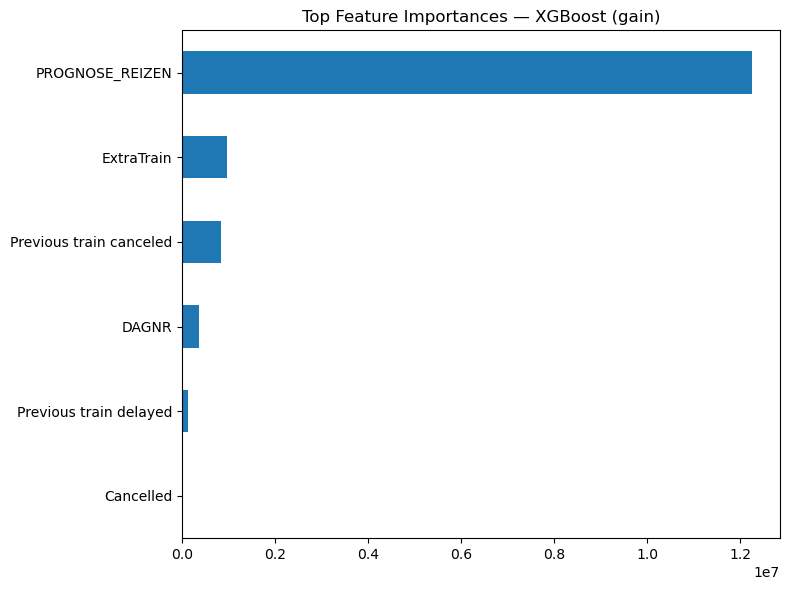

In [78]:
# --- 1) Setup ---
import pandas as pd
import numpy as np
import shap 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

# --- 2) Load data ---
df = pd.read_csv(r"C:\\Users\\Alejandro Fiatt\\Desktop\\TIL\\2026\\Q1\\CIEM6302\\Group2 NS\\complete_dataset_clean_vf.csv",
    sep=";",
    low_memory=False,
    na_values=["", "NA", "NaN", "NULL"]
)

# --- 3) Target and feature setup ---
y = df["REALISATIE"]

# --- 6) Define feature subsets for comparison ---
feature_subsets = {
    "Set 1: Base + Delay (cat)": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "delay_category"],
    "Set 2: Base + Delay (min)": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "delays"],
    "Set 3: Base + Disruption cats": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "disruption_category"],
    "Set 4: Base + Disruption (min)": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "Disruption (minutes)"],
    "Set 5: Base + Weather": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "Rain_flag","Heavy_Rain_flag","Gusts_flag","Storms_flag",
                "Warm_flag","Cold_flag","Sunny_flag"],
    "Set 6: Base + Disruptions features": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "Cancelled","ExtraTrain","Previous train canceled","Previous train delayed"],
    "Set 7: Base + Delay and Disruption (cat), with features": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "Cancelled","ExtraTrain","Previous train canceled","Previous train delayed", "delay_category", "disruption_category"],
    "Set 8: Base + Delay and Disruption (min), with features": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "Cancelled","ExtraTrain","Previous train canceled","Previous train delayed", "delays", "Disruption (minutes)"],
    "Set 9: Base + Delay and Disruption (cat), no features": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "delay_category", "disruption_category"],
    "Set 10: Base + Delay and Disruption (min), no features": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "delays", "Disruption (minutes)"],
    "Set 11: ALL": ["DAGNR", "DAGDEELTREIN", "train_type", "PROGNOSE_REIZEN", "Cancelled","ExtraTrain","Previous train canceled","Previous train delayed", "delay_category", "disruption_category", "Rain_flag","Heavy_Rain_flag","Gusts_flag","Storms_flag",
                "Warm_flag","Cold_flag","Sunny_flag"] # 
}
results = []

# --- 7) Train and evaluate each subset ---
for name, subset in feature_subsets.items():

    # Keep only existing columns
    features = [c for c in (subset) if c in df.columns]
    X = df[features].copy()
    categorical_cols = [c for c in ["DAGDEELTREIN", "train_type","delay_category", "disruption_category"] if c in X.columns]
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

    # --- 4) Chronological split ---
    cutoff_day = df["DAGNR"].max() - 7          # last 7 days as test
    train_mask = df["DAGNR"] <= cutoff_day
    test_mask  = df["DAGNR"] >  cutoff_day

    X_train_full = X[train_mask]
    y_train_full = y[train_mask]
    X_test       = X[test_mask]
    y_test       = y[test_mask]

    print("Train full:", X_train_full.shape, "| Test:", X_test.shape)

    # --- 5) Validation split inside training (chronological) ---
    train_days = np.sort(df.loc[train_mask, "DAGNR"].unique())
    val_days_count = max(1, int(0.2 * len(train_days)))  # ~20% of training days
    val_days = set(train_days[-val_days_count:])
    tr_days  = set(train_days[:-val_days_count]) if val_days_count < len(train_days) else set()

    if len(tr_days) == 0:   # fallback if tiny
        val_days = set(train_days[-2:])
        tr_days  = set(train_days[:-2])

    train_sub_mask = train_mask & df["DAGNR"].isin(tr_days)
    valid_mask     = train_mask & df["DAGNR"].isin(val_days)

    X_tr, y_tr = X[train_sub_mask], y[train_sub_mask]
    X_va, y_va = X[valid_mask],     y[valid_mask]

    print("Train sub:", X_tr.shape, "| Valid:", X_va.shape)

    # --- 6) XGBoost (native API) with early stopping on validation ---
    params = {
        "objective": "reg:squarederror",
        "eval_metric": "mae",
        "eta": 0.03,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "lambda": 1.0,
        "seed": 42
    }

    # Build DMatrices (pass feature names so importance lines up)
    feature_names = list(X.columns)
    dtrain = xgb.DMatrix(X_tr, label=y_tr, feature_names=feature_names)
    dvalid = xgb.DMatrix(X_va, label=y_va, feature_names=feature_names)
    dtest  = xgb.DMatrix(X_test, feature_names=feature_names)

    bst = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=5000,
        evals=[(dvalid, "valid")],
        early_stopping_rounds=200,
        verbose_eval=False
    )

    # --- 7) Evaluate on TEST set ---
    y_pred = bst.predict(dtest)

    mae  = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)

    results.append({
        "Subset": name,
        "Features": subset,
        "R²": r2,
        "RMSE": rmse,
        "MAE": mae
    })


results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("\n🏆 Feature Subset Comparison Results:")
display(results_df)

best_subset_name = results_df.iloc[0]["Subset"]
best_features = feature_subsets[best_subset_name]
print(f"\n✅ Best subset: {best_subset_name}")
print(f"Features: {best_features}")

# --- 8) Train final model on best subset ---
best_features = [f for f in best_features if f in X_train_full.columns]
X_train_best = X_train_full[best_features]
X_test_best = X_test[best_features]
dtrain_best = xgb.DMatrix(X_train_best, label=y_train_full)
dtest_best = xgb.DMatrix(X_test_best, label=y_test)

final_model = xgb.train(
    params=params,
    dtrain=dtrain_best,
    num_boost_round=500,
    evals=[(dtest_best, "test")],
    early_stopping_rounds=20,
    verbose_eval=False
)

final_pred = final_model.predict(dtest_best)

final_r2 = r2_score(y_test, final_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
final_mae = mean_absolute_error(y_test, final_pred)

print("\n🎯 Final Model Performance (Best Subset):")
print(f"MAE: {final_mae:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"R²: {final_r2:.4f}")

# --- Operator baseline ---
if "PROGNOSE_REIZEN" in df.columns:
    op_pred  = df.loc[test_mask, "PROGNOSE_REIZEN"]
    op_mae   = mean_absolute_error(y_test, op_pred)
    op_rmse  = np.sqrt(mean_squared_error(y_test, op_pred))
    op_r2    = r2_score(y_test, op_pred)

    print("\nOperator Forecast (PROGNOSE_REIZEN) — Test results:")
    print("MAE:", round(op_mae, 2))
    print("RMSE:", round(op_rmse, 2))
    print("R²:", round(op_r2, 3))

# --- 8) Feature importance (gain) ---
score_dict = final_model.get_score(importance_type="gain")
fi = pd.Series({f: score_dict.get(f, 0.0) for f in X_test_best.columns}).sort_values(ascending=True).tail(10)
fi.plot(kind="barh", figsize=(8,6))
plt.title("Top Feature Importances — XGBoost (gain)")
plt.tight_layout()
plt.show()

Features used in SHAP: ['DAGNR', 'PROGNOSE_REIZEN', 'Cancelled', 'ExtraTrain', 'Previous train canceled', 'Previous train delayed']


ExactExplainer explainer: 23460it [04:08, 89.69it/s]                            


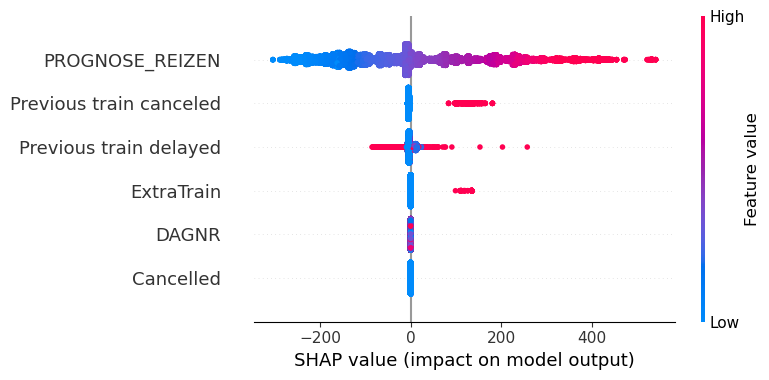

                   Feature  Gain Importance  SHAP Mean |value|
0          PROGNOSE_REIZEN     1.224522e+07       1.407779e+02
1  Previous train canceled     8.281389e+05       1.050269e+01
2   Previous train delayed     1.265225e+05       6.679611e+00
3               ExtraTrain     9.557928e+05       1.426950e+00
4                    DAGNR     3.663353e+05       2.263566e-14
5                Cancelled     0.000000e+00       0.000000e+00


In [72]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Make Booster callable
def booster_predict(X):
    dmatrix = xgb.DMatrix(X, feature_names=list(X.columns))
    return final_model.predict(dmatrix)

print("Features used in SHAP:", list(X_test_best.columns))

# SHAP explainer
explainer = shap.Explainer(booster_predict, X_test_best)
shap_values = explainer(X_test_best)

# Summary plot
shap.summary_plot(shap_values.values, X_test_best)

# Make sure all features are included (missing ones get 0)
all_features = X_test_best.columns
fi = fi.reindex(all_features, fill_value=0)

# --- 4) SHAP mean |value| ---
shap_mean_abs = pd.Series(np.abs(shap_values.values).mean(axis=0), index=X_test_best.columns)

# --- 5) Combine into a table ---
importance_table = pd.DataFrame({
    "Feature": X_test_best.columns,
    "Gain Importance": fi.values,
    "SHAP Mean |value|": shap_mean_abs.values
})

# Optional: sort by SHAP importance
importance_table = importance_table.sort_values(by="SHAP Mean |value|", ascending=False).reset_index(drop=True)

# --- 6) Display ---
print(importance_table)
